In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pickle
from google.colab import drive


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/fyp/fyp2/finalised/csv/train_v2.csv')
train = train.loc[:,['temp2', 'temp3', 'weather3']]

test = pd.read_csv('/content/drive/MyDrive/fyp/fyp2/finalised/csv/test_v2.csv')
test = test.loc[:,['temp2', 'temp3', 'weather3']]


train

,temp2,temp3,weather3
0,28.9,30.0,sunny
1,16.0,15.0,rainy
2,28.9,30.0,sunny
3,21.7,27.2,sunny
4,2.0,2.0,rainy
...,...,...,...
2203,30.0,30.0,sunny
2204,5.0,5.0,rainy
2205,22.0,23.0,sunny
2206,27.0,26.0,sunny


# One-hot encoding test data

In [ ]:
test = pd.get_dummies(test)
X_test = test.loc[:, ['temp2', 'temp3']]
y_test = test.weather3_sunny

y_test

0      1
1      0
2      0
3      1
4      1
      ..
923    1
924    1
925    0
926    1
927    1
Name: weather3_sunny, Length: 928, dtype: uint8

# balance train data (SMOTE)

sunny    1712
rainy     496
Name: weather3, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

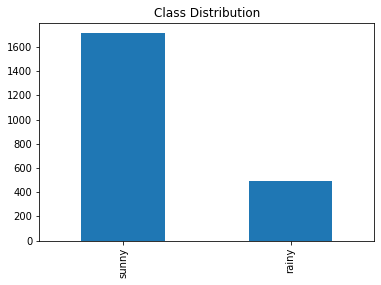

In [ ]:
print(train.weather3.value_counts())
train.weather3.value_counts().plot(kind="bar")
plt.title("Class Distribution")

In [ ]:
temp = pd.get_dummies(train)
X = temp.drop(columns = ['weather3_rainy', 'weather3_sunny'], axis = 1)
y = temp.weather3_sunny

smt = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=5)

X_res, y_res = smt.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train = pd.DataFrame(X_res, columns = ['temp2', 'temp3'])
train['sunny'] = y_res
train

,temp2,temp3,sunny
0,28.900000,30.000000,1
1,16.000000,15.000000,0
2,28.900000,30.000000,1
3,21.700000,27.200000,1
4,2.000000,2.000000,0
...,...,...,...
3419,10.205422,10.000000,0
3420,5.000000,4.000000,0
3421,6.000000,5.000000,0
3422,15.998175,16.998631,0


1    1712
0    1712
Name: sunny, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

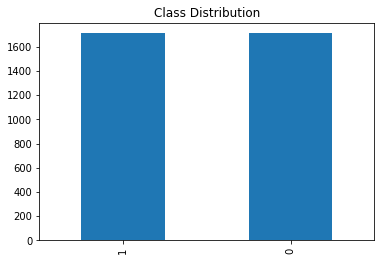

In [ ]:
print(train.sunny.value_counts())
train.sunny.value_counts().plot(kind="bar")
plt.title("Class Distribution")

In [ ]:
X_train = train.loc[:, ['temp2', 'temp3']]
X_train = X_train.round(decimals=1)
y_train = train.sunny
X_train

,temp2,temp3
0,28.9,30.0
1,16.0,15.0
2,28.9,30.0
3,21.7,27.2
4,2.0,2.0
...,...,...
3419,10.2,10.0
3420,5.0,4.0
3421,6.0,5.0
3422,16.0,17.0


In [ ]:
performance = pd.DataFrame(columns = ['model', 'cross_validation_score', 'Precision', 'Recall', 'F1', 'Accuracy'])

# SVM

In [ ]:
model_svm_linear = svm.SVC(kernel='linear', gamma='auto', random_state = 10, probability=True)
scores = cross_val_score(model_svm_linear, X_train, y_train, cv=5)
model_svm_linear.fit(X_train, y_train)
y_pred_SVM_linear = model_svm_linear.predict(X_test)

# evaluasion
print("Accuracy on training set: {:.3f}".format(model_svm_linear.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_svm_linear.score(X_test, y_test)))
print("Mean cross validation score: {:.3f}".format(np.mean(scores)))

confusion_majority=confusion_matrix(y_test, y_pred_SVM_linear)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred_SVM_linear)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred_SVM_linear)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred_SVM_linear)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred_SVM_linear)))

pickle.dump(model_svm_linear, open('/content/drive/MyDrive/fyp/fyp2/finalised/code/classification summary/svm_linear.sav', 'wb'))
performance.loc[len(performance)] = ['svm_linear', np.mean(scores), precision_score(y_test, y_pred_SVM_linear).round(2), recall_score(y_test, y_pred_SVM_linear).round(2), f1_score(y_test, y_pred_SVM_linear).round(2), accuracy_score(y_test, y_pred_SVM_linear).round(2)]

Accuracy on training set: 0.769
Accuracy on test set: 0.727
Mean cross validation score: 0.769
Mjority classifier Confusion Matrix
 [[171  31]
 [222 504]]
**********************
Mjority TN=  171
Mjority FP= 31
Mjority FN=  222
Mjority TP=  504
**********************
Precision= 0.94
Recall= 0.69
F1= 0.80
Accuracy= 0.73


In [ ]:
model_svm_rbf = svm.SVC(kernel='rbf', gamma='auto', random_state = 10, probability=True)
scores = cross_val_score(model_svm_rbf, X_train, y_train, cv=5)
model_svm_rbf.fit(X_train, y_train)
y_pred_SVM_rbf = model_svm_rbf.predict(X_test)

# evaluasion
print("Accuracy on training set: {:.3f}".format(model_svm_rbf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_svm_rbf.score(X_test, y_test)))
print("Mean cross validation score: {:.3f}".format(np.mean(scores)))

confusion_majority=confusion_matrix(y_test, y_pred_SVM_rbf)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred_SVM_rbf)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred_SVM_rbf)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred_SVM_rbf)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred_SVM_rbf)))

pickle.dump(model_svm_linear, open('/content/drive/MyDrive/fyp/fyp2/finalised/code/classification summary/svm_rbf.sav', 'wb'))
performance.loc[len(performance)] = ['svm_rbf', np.mean(scores), precision_score(y_test, y_pred_SVM_rbf).round(2), recall_score(y_test, y_pred_SVM_rbf).round(2), f1_score(y_test, y_pred_SVM_rbf).round(2), accuracy_score(y_test, y_pred_SVM_rbf).round(2)]

Accuracy on training set: 0.832
Accuracy on test set: 0.753
Mean cross validation score: 0.819
Mjority classifier Confusion Matrix
 [[168  34]
 [195 531]]
**********************
Mjority TN=  168
Mjority FP= 34
Mjority FN=  195
Mjority TP=  531
**********************
Precision= 0.94
Recall= 0.73
F1= 0.82
Accuracy= 0.75


# Random Forest

In [ ]:
# random forest

rfc = RandomForestClassifier(random_state = 10)
print(rfc.get_params())
print()

scores = cross_val_score(rfc, X_train, y_train, cv=5)
rfc = rfc.fit(X_train, y_train)
y_pred_RFC = rfc.predict(X_test)

print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))
print("Mean cross validation score: {:.3f}".format(np.mean(scores)))

confusion_majority=confusion_matrix(y_test, y_pred_RFC)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred_RFC)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred_RFC)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred_RFC)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred_RFC)))

pickle.dump(model_svm_linear, open('/content/drive/MyDrive/fyp/fyp2/finalised/code/classification summary/random_forest.sav', 'wb'))
performance.loc[len(performance)] = ['random forest', np.mean(scores), precision_score(y_test, y_pred_RFC).round(2), recall_score(y_test, y_pred_RFC).round(2), f1_score(y_test, y_pred_RFC).round(2), accuracy_score(y_test, y_pred_RFC).round(2)]

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}

Accuracy on training set: 0.909
Accuracy on test set: 0.776
Mean cross validation score: 0.840
Mjority classifier Confusion Matrix
 [[152  50]
 [158 568]]
**********************
Mjority TN=  152
Mjority FP= 50
Mjority FN=  158
Mjority TP=  568
**********************
Precision= 0.92
Recall= 0.78
F1= 0.85
Accuracy= 0.78


In [ ]:
performance.to_csv('/content/drive/MyDrive/fyp/fyp2/finalised/code/classification summary/matrix.csv', encoding='utf-8', index=False)

In [ ]:
performance

,model,cross_validation_score,Precision,Recall,F1,Accuracy
0,svm_linear,0.768700,0.94,0.69,0.80,0.73
1,svm_rbf,0.818932,0.94,0.73,0.82,0.75
2,random forest,0.839965,0.92,0.78,0.85,0.78
